In [10]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Task 0. Valid Convolution
"""
Function that performs a valid convolution on greyscale images
"""
def convolve_grayscale_valid(images, kernel):
    """
    images: numpy.nparray with shape (m, h, w) containing multiple greyscale
    images
        m: number of images
        h: height of the images in pixels
        w: width of the images in pixels
    kernel: numpy.ndarray with shape (kh, kw) containing the kernel for
    convolution
        kh: kernel height
        kw: kernel width
    Only allowed to use two for loops, no loops of other kind
    Returns a numpy.ndarray containing the convolved images
    """
    m = images.shape[0]
    h = images.shape[1]
    w = images.shape[2]

    kh = kernel.shape[0]
    kw = kernel.shape[1]

    cvh = h - kh + 1 #convolve valid height
    cvw = w - kw + 1 #convolve valid width
    cvm = np.zeros((m, cvh, cvw)) #convolve valid matrix

    # print(np.shape(images))
    # print(np.shape(kernel))
    # print(np.shape(cvm))

    for x in range(cvh):
        for y in range(cvw):
            # print("images", end="")
            # print(np.shape(images[:, x:x + kh, y:y + kw]))
            # print("kernel", end="")
            # print(np.shape(kernel))
            hadamard_prod = np.multiply(images[:, x:x + kh, y:y + kw], kernel)
            # print("hadamard", end="")
            # print(np.shape(hadamard_prod))
            cvm[:, x, y] = np.sum(hadamard_prod, axis=(1, 2))
    return cvm



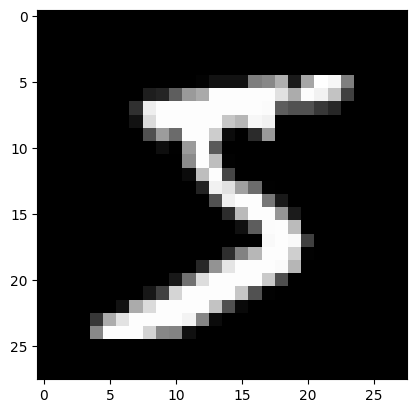

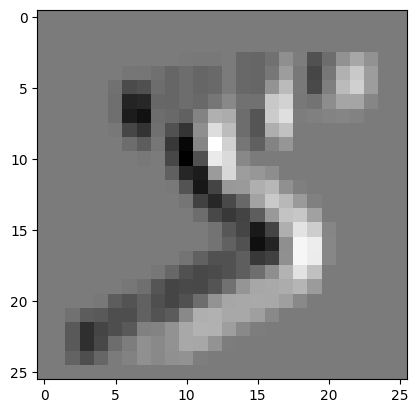

In [12]:
# 0-main
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
# print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_valid(images, kernel)
# print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [33]:
# Task 1. Same Convolution
"""
Function that performs a same convolution on greyscale images
"""
def convolve_grayscale_same(images, kernel):
    """
    images: numpy.nparray with shape (m, h, w) containing multiple greyscale
    images
        m: number of images
        h: height of the images in pixels
        w: width of the images in pixels
    kernel: numpy.ndarray with shape (kh, kw) containing the kernel for
    convolution
        kh: kernel height
        kw: kernel width
    If necessary, the image should be padded with 0's
    Only allowed to use two for loops, no loops of other kind
    Returns a numpy.ndarray containing the convolved images
    """
    kh = kernel.shape[0]
    kw = kernel.shape[1]

    pad_top_bottom = kh // 2
    pad_left_right = kw // 2

    print(np.shape(images))
    images = np.pad(images, ((0, 0), (pad_top_bottom, pad_top_bottom),
                             (pad_left_right, pad_left_right)))
    print(np.shape(images))
    m = images.shape[0]
    h = images.shape[1]
    w = images.shape[2]

    csm = np.zeros((m, h - pad_top_bottom * 2, w - pad_left_right * 2)) # convolve same matrix
    print(np.shape(csm))
    # print(csh)
    # print(csw)

    for x in range(1, (h - 2)):
        for y in range(1, (w - 2)):
            print("Matrix Location ({}, {})".format(x, y))
            hadamard_prod = np.multiply(images[:, x:x + kh, y:y + kw], kernel)
            csm[:, x, y] = np.sum(hadamard_prod, axis=(1, 2))
    # print(np.shape(csm))
    # np.pad(csm, [(1, 0), (1, 0)], mode='constant')
    # print(np.shape(csm))
    return csm


(50000, 28, 28)
(50000, 30, 30)
(50000, 28, 28)
Matrix Location (1, 1)
Matrix Location (1, 2)
Matrix Location (1, 3)
Matrix Location (1, 4)
Matrix Location (1, 5)
Matrix Location (1, 6)
Matrix Location (1, 7)
Matrix Location (1, 8)
Matrix Location (1, 9)
Matrix Location (1, 10)
Matrix Location (1, 11)
Matrix Location (1, 12)
Matrix Location (1, 13)
Matrix Location (1, 14)
Matrix Location (1, 15)
Matrix Location (1, 16)
Matrix Location (1, 17)
Matrix Location (1, 18)
Matrix Location (1, 19)
Matrix Location (1, 20)
Matrix Location (1, 21)
Matrix Location (1, 22)
Matrix Location (1, 23)
Matrix Location (1, 24)
Matrix Location (1, 25)
Matrix Location (1, 26)
Matrix Location (1, 27)
Matrix Location (2, 1)
Matrix Location (2, 2)
Matrix Location (2, 3)
Matrix Location (2, 4)
Matrix Location (2, 5)
Matrix Location (2, 6)
Matrix Location (2, 7)
Matrix Location (2, 8)
Matrix Location (2, 9)
Matrix Location (2, 10)
Matrix Location (2, 11)
Matrix Location (2, 12)
Matrix Location (2, 13)
Matrix Loc

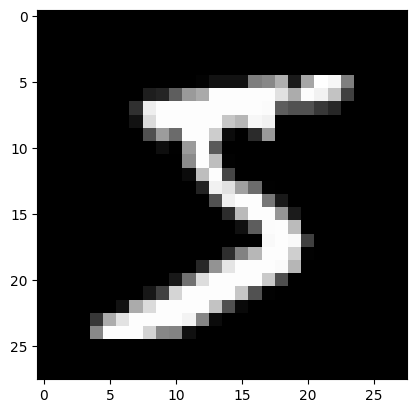

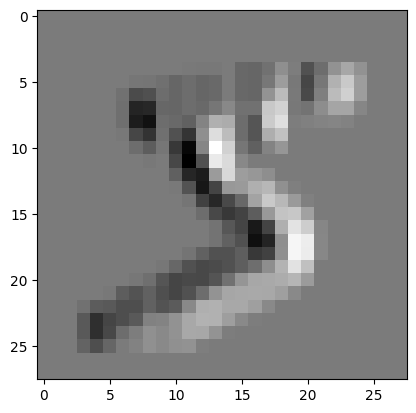

In [34]:
# 1-main
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
# print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_same(images, kernel)
# print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()